<a href="https://colab.research.google.com/github/AG-01/digit-recognizer-kaggle/blob/other/digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
from collections import Counter
import math
# Importing Library for Data Visualization
import matplotlib.pyplot as plt

import sklearn
# Importing Algorithms for Model Training
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve

In [2]:
!unzip -qq /content/drive/MyDrive/digit-recognizer.zip

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
training_data = pd.read_csv('/content/train.csv')

In [ ]:
train_label = train['label']
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# No. of Rows & Columns
train.shape

(42000, 785)

In [ ]:
# def create_pie(df, target_variable, figsize=(10, 10)):
#     print(df[target_variable].value_counts())
#     fig, ax = plt.subplots(figsize=figsize)
#     ax.pie(df[target_variable].value_counts().values, labels=df[target_variable].value_counts().index, autopct='%1.2f%%', textprops={'fontsize': 10})
#     ax.axis('equal')
#     plt.title(target_variable)
#     plt.show()
    

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


<Figure size 1800x1800 with 0 Axes>

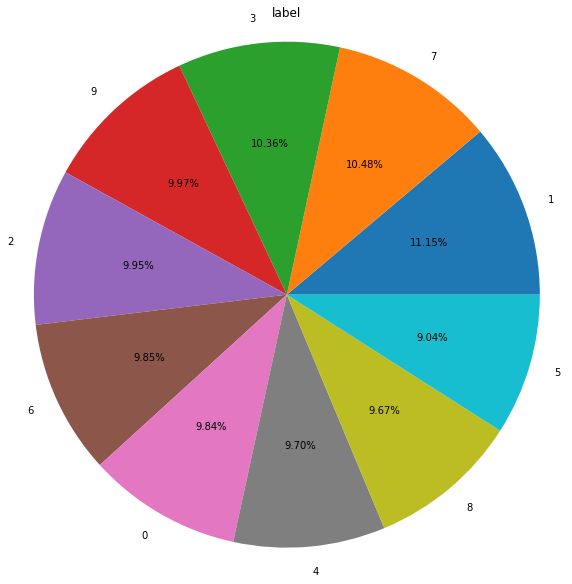

In [ ]:
# plt.figure(figsize=(25, 25))
# create_pie(train, 'label')

In [ ]:
cp = train.drop(['label'], axis=1)
ratio = int(math.sqrt(cp.shape[1]))

In [ ]:
train = train.drop(['label'], axis=1)

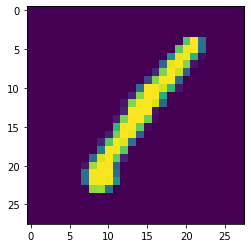

In [ ]:
first_image = train.iloc[0]
first_image = np.array(first_image).reshape(ratio, ratio)
plt.imshow(first_image);

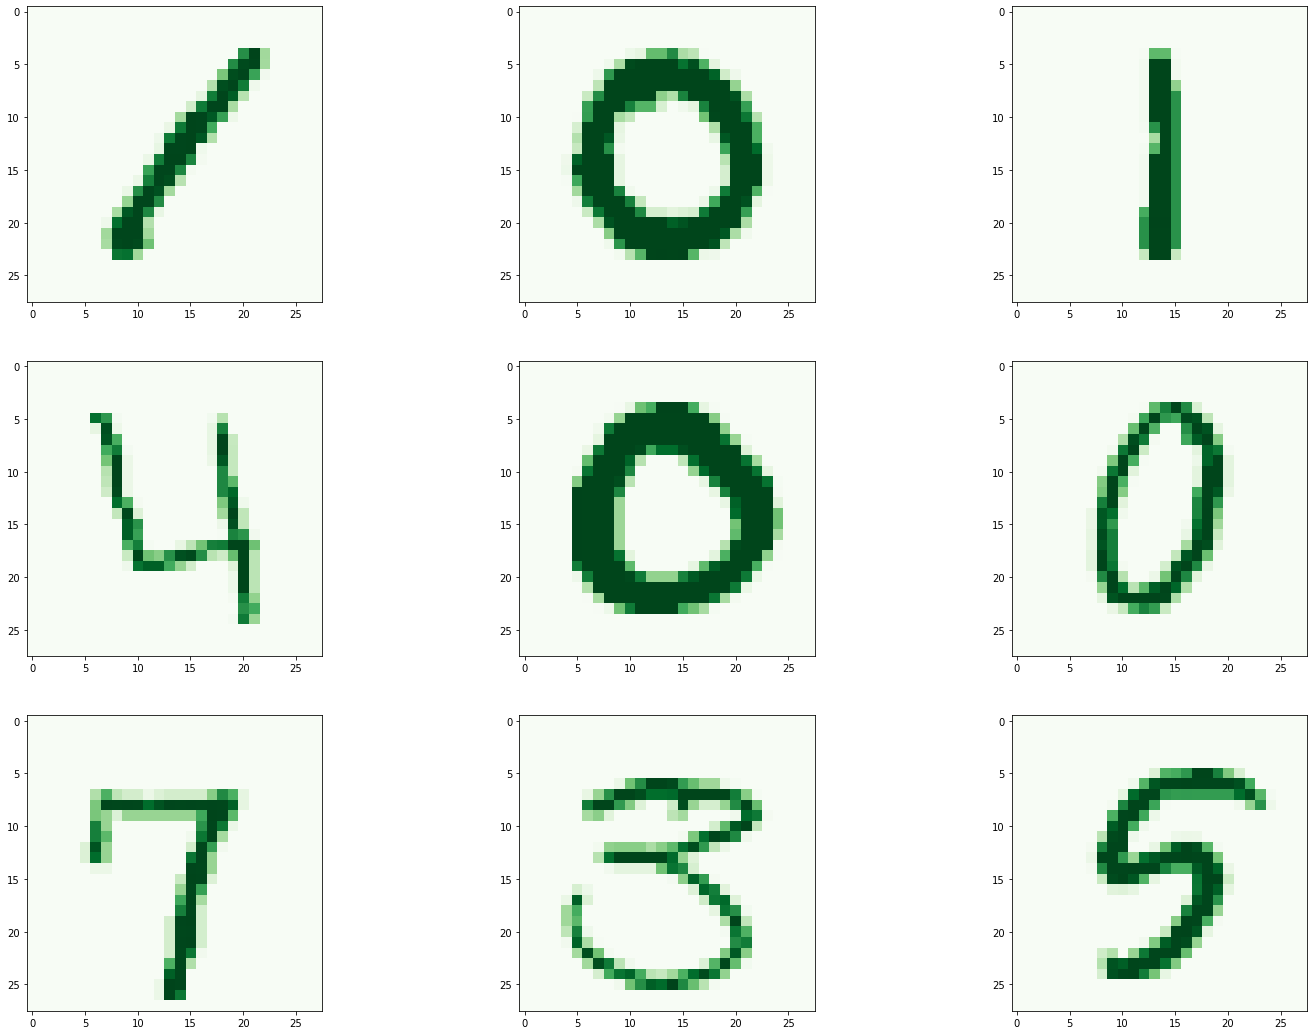

In [ ]:
# trying to see 9 first images
plt.figure(figsize=(25, 25))
columns = 3
firsts_image = train.iloc[:10]


for i in range(0, 9):
    image = np.array(train.iloc[i]).reshape(ratio, ratio)
    
    plt.subplot(int( firsts_image.shape[0]/ columns + 1), columns, i + 1)
    plt.imshow(image, cmap='Greens')

In [ ]:
X = train
y = train_label.to_list()

X = train[:1000]
y = train_label[:1000].to_list()

X = X / 255.0

# split our data into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# and we also need a validation set 
X_test, X_val, y_test, y_val = train_test_split( X_test, y_test,
                                                    test_size=0.3,
                                                    random_state=42)
        
# normalized paramas
# {'coef0': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}

SVM = svm.SVC(gamma=0.1, coef0=1, kernel='poly', degree=2)
SVM.fit(X_train, y_train) 
index = 1
#image = np.array(X_train.iloc[i]).reshape(ratio, ratio)
x_pred = SVM.predict(X_test)
print('prediction: \n', x_pred)

X_prediction = SVM.predict(X_test)
print(f'test accuracy: \t{accuracy_score(y_test,X_prediction)}')
print(f'{classification_report(y_test, X_prediction)}')

# Plot Actual vs. Predicted 
y_test = y_test
predicted = SVM.predict(X_test)
'''
plt.figure(figsize=(28, 8))
plt.title("all images -- Actual vs. Predicted SVM model -- normalized ", fontsize=20)
plt.scatter(y_test, predicted,
            color="purple", marker="o", facecolors="none")

plt.plot([0, 9], [0, 9], "darkorange", lw=2)
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.xlabel("Y test", fontsize=16)
plt.ylabel("Predicted Y", fontsize=16)
plt.show()


N,train_score, val_score = learning_curve(model, X_train, y_train,
                                   train_sizes=np.linspace(0.2,1.0,10 ),cv=5)

plt.figure(figsize=(28, 8))
plt.title("all images -- Learning Curve -- normalized ", fontsize=20)
plt.plot(N, train_score.mean(axis = 1), label ='Train')
plt.plot(N, val_score.mean(axis = 1), label ='Validation')
plt.xlabel('train sizes')
plt.legend();'''

# Parameter Grid
param_grid = {'kernel':['linear', 'poly'],# 'rbf', 'sigmoid'],
              'degree':[1, 2,],
              'gamma': [0.01, 0.1],
              'coef0': [0.5, 1]
             }
grid = GridSearchCV(svm.SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)
model = grid.best_estimator_
model
model.score(X_test, y_test)

confusion_matrix(y_test, model.predict(X_test))

prediction: 
 [9 4 3 0 1 9 9 6 2 1 6 5 3 5 9 1 6 0 3 0 5 2 6 2 6 4 4 9 7 9 8 0 8 9 6 8 2
 2 7 8 4 0 3 9 0 1 2 7 0 5 2 1 7 6 3 2 4 0 4 8 5 3 4 6 5 4 1 8 7 6 6 2 2 3
 7 9 9 9 2 2 7 1 1 1 0 2 7 2 7 2 7 7 9 5 9 0 9 2 0 1 0 2 6 7 8 9 8 1 6 1 8
 6 4 6 9 7 3 3 0 1 3 0 2 5 0 6 4 0 4 5 0 3 2 7 1 2 5 4 8 1 1 6 6 2 4 7 0 6
 6 0 4 9 6 0 1 4 2 9 3 9 7 1 2 5 3 1 6 6 3 2 1 2 0 8 4 2 6 1 8 0 0 6 0 2 9
 8 9 1 9 9 6 5 0 0 1 1 7 2 9 1 4 7 8 3 1 3 7 9 4 9]
test accuracy: 	0.8714285714285714
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       0.88      0.96      0.92        24
           2       0.93      0.87      0.90        30
           3       1.00      0.89      0.94        18
           4       0.94      0.77      0.85        22
           5       0.92      0.85      0.88        13
           6       0.72      0.86      0.78        21
           7       0.89      0.81      0.85        21
           8       0.93      0.81    

array([[22,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1, 26,  0,  0,  0,  1,  1,  1,  0],
       [ 0,  1,  0, 16,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 17,  0,  3,  0,  0,  2],
       [ 1,  0,  0,  0,  0, 11,  1,  0,  0,  0],
       [ 2,  0,  1,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  1, 17,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 13,  2],
       [ 1,  0,  0,  0,  1,  0,  0,  1,  0, 20]])

In [ ]:
# Data Expansion
from sklearn.datasets import load_digits
from tensorflow.keras.datasets import mnist

digits = load_digits()
(X_train, y_train), (X_test, y_test) = mnist.load_data()

train = pd.read_csv('/content/train.csv')

train_label = train['label']

In [ ]:
digit_data = digits.data
digit_target = digits.target
'''print(len(digit_data))
print(digit_data.shape)
print(digit_data[0])
print(len(digit_target))'''

'''ratio = int(math.sqrt(digit_data[0].shape[0]))

# trying to see 9 first images
plt.figure(figsize=(25, 25))
columns = 3
firsts_image = digit_data[:10]


for i in range(0, 9):
    image = np.array(digit_data[i]).reshape(ratio, ratio)
    
    plt.subplot(int( firsts_image.shape[0]/ columns + 1), columns, i + 1)
    plt.imshow(image, cmap='Purples')'''

"ratio = int(math.sqrt(digit_data[0].shape[0]))\n\n# trying to see 9 first images\nplt.figure(figsize=(25, 25))\ncolumns = 3\nfirsts_image = digit_data[:10]\n\n\nfor i in range(0, 9):\n    image = np.array(digit_data[i]).reshape(ratio, ratio)\n    \n    plt.subplot(int( firsts_image.shape[0]/ columns + 1), columns, i + 1)\n    plt.imshow(image, cmap='Purples')"

In [ ]:
# Keras train image 28 X 28 px
# I could use it with my actual dataset 


digit_data = X_train
digit_target = y_train
'''print(len(digit_data))
print(digit_data.shape)
print(digit_data[0])
print(len(digit_target))'''

'''# trying to see 9 first images
plt.figure(figsize=(25, 25))
columns = 3
firsts_image = digit_data[:10]


for i in range(0, 9):
    image = np.array(digit_data[i])#.reshape(ratio, ratio)
    
    plt.subplot(int( firsts_image.shape[0]/ columns + 1), columns, i + 1)
    plt.imshow(image, cmap='Purples')'''

"# trying to see 9 first images\nplt.figure(figsize=(25, 25))\ncolumns = 3\nfirsts_image = digit_data[:10]\n\n\nfor i in range(0, 9):\n    image = np.array(digit_data[i])#.reshape(ratio, ratio)\n    \n    plt.subplot(int( firsts_image.shape[0]/ columns + 1), columns, i + 1)\n    plt.imshow(image, cmap='Purples')"

In [ ]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

X_trainB = np.append(X_train, X_test).reshape(-1, 28 * 28)
print(X_trainB.shape)

y_trainB = np.append(y_train, y_test)
print(y_trainB.shape)

'''train_label = train['label']
train = pd.read_csv('/content/train.csv')
train'''

(60000, 28, 28)
(10000, 28, 28)
(70000, 784)
(70000,)


"train_label = train['label']\ntrain = pd.read_csv('/content/train.csv')\ntrain"

In [ ]:
train = pd.read_csv('/content/train.csv')
train_label = train['label']
train = train.drop(['label'], axis=1)

X_train = np.append(X_trainB, train).reshape(-1, 28 * 28)
print(X_train.shape)

y_train = np.append(y_trainB, train_label)
print(y_train.shape)

(112000, 784)
(112000,)


In [ ]:
X = X_train
y = y_train

X = X / 255.0

# split our data into train and test
'''X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size=0.3,
                                                    random_state=42)'''

# and we also need a validation set 
'''X_test, X_val, y_test, y_val = train_test_split( X_test, y_test,
                                                    test_size=0.3,
                                                    random_state=42)'''
        
# normalized paramas
# {'coef0': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}

SVM = svm.SVC(gamma=0.1, coef0=1, kernel='poly', degree=2)
SVM.fit(X, y) 
'''index = 1
#image = np.array(X_train.iloc[i]).reshape(ratio, ratio)
x_pred = SVM.predict(X_test)
print('prediction: \n', x_pred)

X_prediction = SVM.predict(X_test)
print(f'test accuracy: \t{accuracy_score(y_test,X_prediction)}')
print(f'{classification_report(y_test, X_prediction)}')'''

# Plot Actual vs. Predicted 
'''y_test = y_test
predicted = SVM.predict(X_test)

plt.figure(figsize=(28, 8))
plt.title("all images -- Actual vs. Predicted SVM model -- normalized ", fontsize=20)
plt.scatter(y_test, predicted,
            color="purple", marker="o", facecolors="none")

plt.plot([0, 9], [0, 9], "darkorange", lw=2)
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.xlabel("Y test", fontsize=16)
plt.ylabel("Predicted Y", fontsize=16)
plt.show()'''


'''N,train_score, val_score = learning_curve(model, X_train, y_train,
                                   train_sizes=np.linspace(0.2,1.0,10 ),cv=3)

plt.figure(figsize=(28, 8))
plt.title("all images -- Learning Curve -- normalized ", fontsize=20)
plt.plot(N, train_score.mean(axis = 1), label ='Train')
plt.plot(N, val_score.mean(axis = 1), label ='Validation')
plt.xlabel('train sizes')
plt.legend();'''


#confusion_matrix(y_test, model.predict(X_test))

'N,train_score, val_score = learning_curve(model, X_train, y_train,\n                                   train_sizes=np.linspace(0.2,1.0,10 ),cv=3)\n\nplt.figure(figsize=(28, 8))\nplt.title("all images -- Learning Curve -- normalized ", fontsize=20)\nplt.plot(N, train_score.mean(axis = 1), label =\'Train\')\nplt.plot(N, val_score.mean(axis = 1), label =\'Validation\')\nplt.xlabel(\'train sizes\')\nplt.legend();'

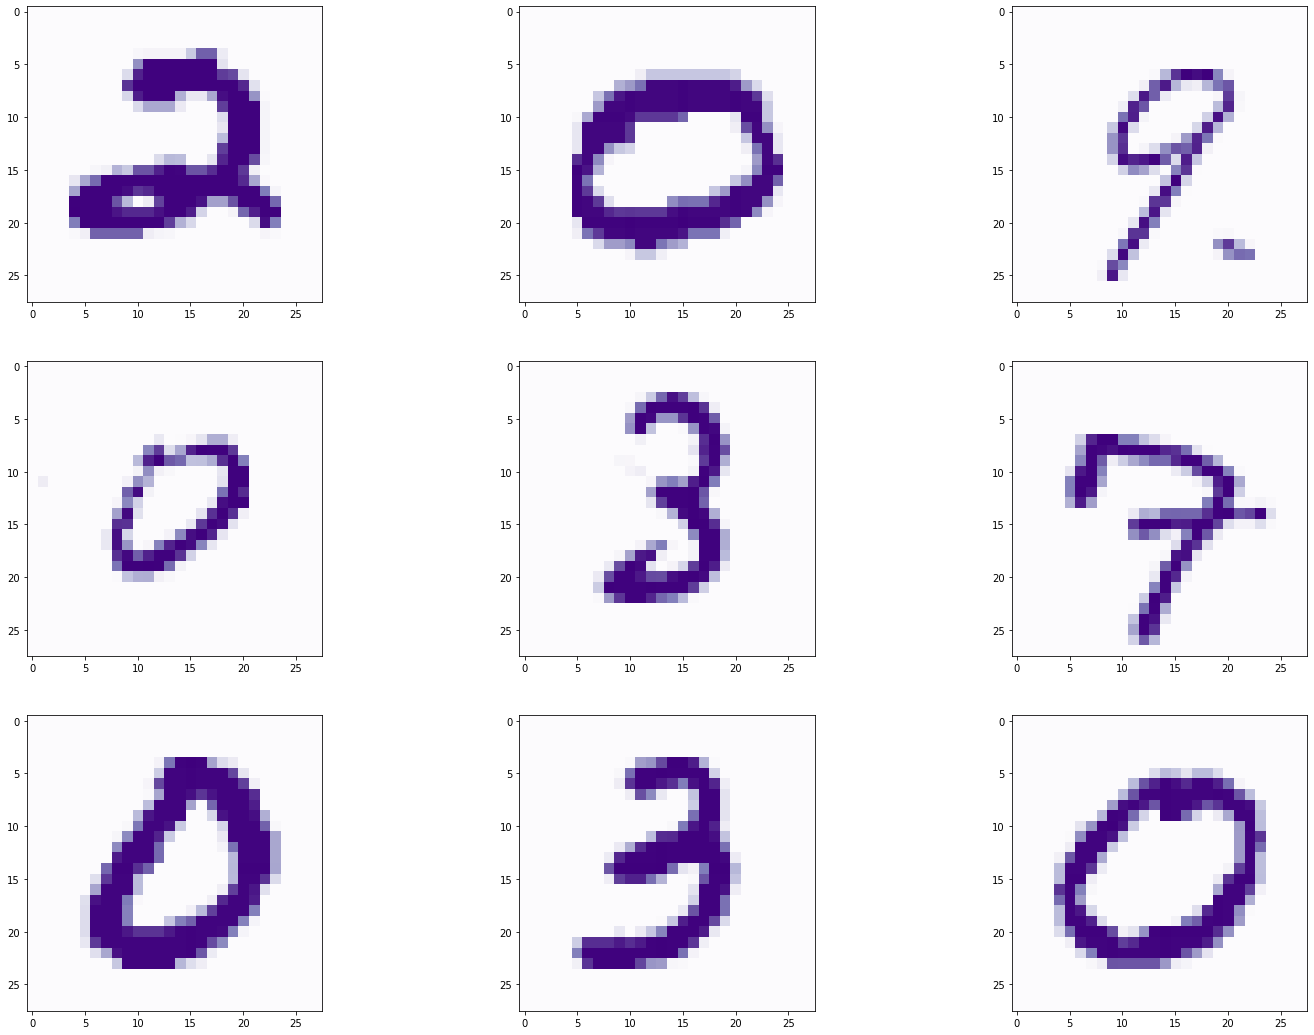

In [ ]:

plt.figure(figsize=(25, 25))
columns = 3
firsts_image = test.iloc[:10]


for i in range(0, 9):
    image = np.array(test.iloc[i]).reshape(ratio, ratio)
    
    plt.subplot(int( firsts_image.shape[0]/ columns + 1), columns, i + 1)
    plt.imshow(image, cmap='Purples')


In [ ]:
x_submit = test.copy()
x_submit = x_submit / 255.0

In [ ]:
X_prediction = SVM.predict(x_submit)
print('prediction: \n', X_prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


prediction: 
 [2 0 9 ... 3 9 2]


In [ ]:
pred = pd.Series(X_prediction, name='Label')
pred.head()

index_list = []

for i, item in enumerate(pred):
    index_list.append(i+1)
    
image_id = pd.Series(index_list, name='ImageId')

In [ ]:
submit = pd.concat([image_id, pred], axis=1)
submit.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')
submit.tail()
sub = pd.read_csv('./submission.csv')
sub

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
newPredictions.to_csv("NewPredictions.csv", index=False)

from google.colab import files
files.download('NewPredictions.csv')